# 1. Load the Datasets

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-18 04:07:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  33.6MB/s    in 10s     

2020-06-18 04:07:53 (30.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# 2. Importing the important library

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from shutil import copyfile
import random
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 3. Unzip and split the dataset

In the code below we will unzip the dataset. After that we will create a different directories to store the training and validation dataset

In [ ]:
# Unzip the Datasets
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

In [ ]:
print(os.listdir(base_dir))

['README_rpc-cv-images.txt', 'rock', 'scissors', 'rps-cv-images', 'paper']


In [ ]:
#Source directories
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total rock images = ', len(os.listdir(rock_dir)))
print('total paper images = ', len(os.listdir(paper_dir)))
print('total scissors images = ', len(os.listdir(scissors_dir)))

total rock images =  726
total paper images =  712
total scissors images =  750


In [ ]:
#Make a new directories for store the training and validation data in every classes

try:
    os.makedirs("/tmp/rockpaperscissors/training")
    os.makedirs("/tmp/rockpaperscissors/training/rock")
    os.makedirs("/tmp/rockpaperscissors/training/paper")
    os.makedirs("/tmp/rockpaperscissors/training/scissors")
    os.makedirs("/tmp/rockpaperscissors/validation")
    os.makedirs("/tmp/rockpaperscissors/validation/rock")
    os.makedirs("/tmp/rockpaperscissors/validation/paper")
    os.makedirs("/tmp/rockpaperscissors/validation/scissors")
except OSError:
    pass

print(os.listdir("/tmp/rockpaperscissors"))

['README_rpc-cv-images.txt', 'rock', 'scissors', 'rps-cv-images', 'paper', 'validation', 'training']


In [ ]:
#Function for assign the data into new directories
def spliting_data(source, training, validation, split_size):
  datasets = os.listdir(source)
  randomize_datasets = random.sample(datasets, len(datasets))

  train_size = len(datasets)*split_size
  validation_size = len(datasets) - train_size

  for i, filename in enumerate(randomize_datasets):
    filepath = os.path.join(source, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(training, filename))
        img = Image.open(os.path.join(training, filename)).convert('L')
        img.save(os.path.join(training, filename))
      else:
        copyfile(filepath, os.path.join(validation, filename))
        img = Image.open(os.path.join(validation, filename)).convert('L')
        img.save(os.path.join(validation, filename))

In [ ]:
training_rock_dir = "/tmp/rockpaperscissors/training/rock"
validation_rock_dir = "/tmp/rockpaperscissors/validation/rock"

training_paper_dir = "/tmp/rockpaperscissors/training/paper"
validation_paper_dir = "/tmp/rockpaperscissors/validation/paper"

training_scissors_dir = "/tmp/rockpaperscissors/training/scissors"
validation_scissors_dir = "/tmp/rockpaperscissors/validation/scissors"

#The name of images in training directory
training_rock_name = os.listdir(training_rock_dir)
training_paper_name = os.listdir(training_paper_dir)
training_scissors_name = os.listdir(training_scissors_dir)


In [ ]:
split_size = 0.7
spliting_data(rock_dir, training_rock_dir, validation_rock_dir, split_size)
spliting_data(paper_dir, training_paper_dir, validation_paper_dir, split_size)
spliting_data(scissors_dir, training_scissors_dir, validation_scissors_dir, split_size)

In [ ]:
print('Total training rock images : ', len(os.listdir(training_rock_dir)), 'images')
print('Total training paper images : ', len(os.listdir(training_paper_dir)), 'images')
print('Total training scissors images : ', len(os.listdir(training_scissors_dir)), 'images')
print('Total validation rock images : ', len(os.listdir(validation_rock_dir)), 'images')
print('Total validation paper images : ', len(os.listdir(validation_paper_dir)), 'images')
print('Total validation scissors images : ', len(os.listdir(validation_scissors_dir)), 'images')

Total training rock images :  509 images
Total training paper images :  499 images
Total training scissors images :  525 images
Total validation rock images :  217 images
Total validation paper images :  213 images
Total validation scissors images :  225 images


# 4. Overview of the datasets

In [ ]:
os.listdir(training_rock_dir)[12]

'ELmZ4ELVncvjq7J6.png'

# 5. Data Preprocessing and Image Data generator

In [ ]:
#Augmented the datasets
TRAINING_DIR = "/tmp/rockpaperscissors/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rockpaperscissors/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

batch_size_train = 64
batch_size_val = 32 

#Using Image Data Generator
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
  batch_size=batch_size_train,
	class_mode='categorical',
  shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
  batch_size=batch_size_val,
	class_mode='categorical',
  shuffle=True
)

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [ ]:
#Additional variable
train_length = len(os.listdir(training_rock_dir)) + len(os.listdir(training_paper_dir)) + len(os.listdir(training_scissors_dir))
validation_length = len(os.listdir(validation_rock_dir)) + len(os.listdir(validation_paper_dir)) + len(os.listdir(validation_scissors_dir))

# 6. Build the model

In [ ]:
#Using callback to stop training in certain accuracy

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.97):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

Using sequential CNN model 

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#The Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

Training the model 

In [ ]:
#Training the model

history = model.fit(train_generator,
                    steps_per_epoch=(train_length/batch_size_train),
                    epochs=50 ,
                    validation_data = validation_generator,
                    validation_steps=(validation_length/batch_size_val),
                    callbacks=[callbacks],
                    verbose = 1)

Epoch 1/50
24/23 [==============================] - 11s 468ms/step - loss: 1.1023 - accuracy: 0.3379 - val_loss: 1.0955 - val_accuracy: 0.3435
Epoch 2/50
24/23 [==============================] - 11s 470ms/step - loss: 1.0951 - accuracy: 0.3666 - val_loss: 1.0833 - val_accuracy: 0.5527
Epoch 3/50
24/23 [==============================] - 11s 468ms/step - loss: 1.0687 - accuracy: 0.4194 - val_loss: 0.9453 - val_accuracy: 0.4687
Epoch 4/50
24/23 [==============================] - 11s 469ms/step - loss: 0.9934 - accuracy: 0.4938 - val_loss: 0.7163 - val_accuracy: 0.7786
Epoch 5/50
24/23 [==============================] - 11s 469ms/step - loss: 0.8760 - accuracy: 0.6021 - val_loss: 0.5756 - val_accuracy: 0.8031
Epoch 6/50
24/23 [==============================] - 11s 473ms/step - loss: 0.8172 - accuracy: 0.6262 - val_loss: 0.5087 - val_accuracy: 0.7664
Epoch 7/50
24/23 [==============================] - 11s 468ms/step - loss: 0.6983 - accuracy: 0.7019 - val_loss: 0.3597 - val_accuracy: 0.8748

Plotting the loss and accuracy for better understanding

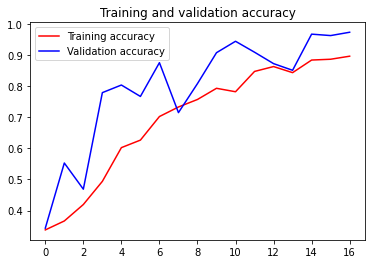

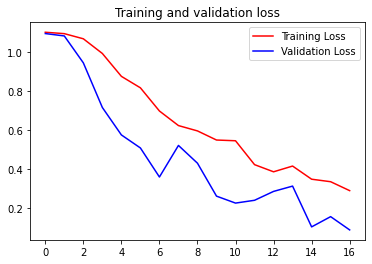

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 7. Predict the model using new images

Upload the new images and the model will predict it

Saving rock.jpg to rock (1).jpg

rock.jpg
[[1. 0. 0.]]
[0]
rock


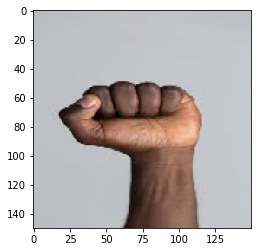

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print("")
  print(fn)
  print(classes)

  max = np.amax(classes[0])
  print(np.where(classes[0] == max)[0])
  if np.where(classes[0] == max)[0] == 0:
    print('rock')
  elif np.where(classes[0] == max)[0] == 1:
    print('paper')
  else:
    print('scissors')